# Time Series Analysis

<div>
    <img src = 'img/roseplant.jpg' style = 'width :500px;' >
</div>

## Types

A time series is a collection of data points that are stored with respect to their time. Mathematical and statistical analysis performed on this kind of data to find hidden patterns and meaningful insight is called time-series analysis. Time-series modeling techniques are used to understand past patterns from the data and try to forecast future horizons. Time-series data is structured in manner such as data from the stock market, weather, birth rates, traffic, bike-sharing apps.

### Univariate and Multivariate

A time series contains data points that increase, decrease, or otherwise change in chronological order over a period. A time series that incorporates the records of a single feature or variable is called a univariate time series. If the records incorporate more than one feature or variable, the series is called a multivariate time series. 

### Continuous or Discrete

Discrete time views values of variables as occurring at distinct, separate "points in time", or equivalently as being unchanged throughout each non-zero region of time ("time period")—that is, time is viewed as a discrete variable.
A discrete signal or discrete-time signal is a time series consisting of a sequence of quantities.

Unlike a continuous-time signal, a discrete-time signal is not a function of a continuous argument; however, it may have been obtained by sampling from a continuous-time signal. When a discrete-time signal is obtained by sampling a sequence at uniformly spaced times, it has an associated sampling rate.

Discrete-time signals may have several origins, but can usually be classified into one of two groups

By acquiring values of an analog signal at constant or variable rate. This process is called sampling.
By observing an inherently discrete-time process, such as the weekly peak value of a particular economic indicator.

A continuous signal or a continuous-time signal is a varying quantity (a signal) whose domain, which is often time, is a continuum (e.g., a connected interval of the reals).

A signal of continuous amplitude and time is known as a continuous-time signal or an analog signal. This (a signal) will have some value at every instant of time. The electrical signals derived in proportion with the physical quantities such as temperature, pressure, sound etc. are generally continuous signals. Other examples of continuous signals are sine wave, cosine wave, triangular wave etc.

Any analog signal is continuous by nature. Discrete-time signals, used in digital signal processing, can be obtained by sampling and quantization of continuous signals. Quantization is nothing but the process of constraining an input from a continuous or otherwise large set of values (such as the real numbers) to a discrete set (such as the integers).

In a continuous time series, data observation is carried out continuously throughout the period, as with earthquake seismograph magnitude data. In a discrete time series , data observation is carried out at a specific time or equally spaced, as with temperature increases or decreases, exchange rates of currencies, air pressure data,etc.,

### Cross - Section Data

Cross-sectional data or cross-section of a population is obtained by taking observations from multiple individuals at the same point in time. Cross-sectional data can comprise of observations taken at different points in time, however, in such cases time itself does not play any significant role in the analysis.Analysis of cross-sectional data usually consists of comparing the differences among selected subjects. SAT scores of high school students in a particular year, Gross domestic product of countries in a given year, Data for customer churn analysis are examples of cross-sectional data. 

### Panel/Longitudinal Data

Panel data/longitudinal data contains observations of multiple occurrences collected over various durations of time for the same individuals(Observations on multiple phenomena over multiple time periods).Panel data combines both cross-sectional and time series data ideas and looks at how the subjects (firms, individuals, etc.) change over a time series. It is data that is determined periodically by the number of observations in cross-sectional data units such as individuals, companies, or government agencies.


## Characteristics

1. Trend
2. Seasonality
3. Cyclical Variations
4. Errors, residuals, unexpected variations

### Trend

A trend is a pattern that is observed over a period of time and represents the mean rate of change with respect to time. A trend usually shows the tendency of the data to increase/uptrend or decrease/downtrend during the long run. It is not always necessary that the increase or decrease is in the same direction throughout the given period of time.

#### Detecting Trend

##### Using HP(Hodrick-Prescott) Filter

The Hodrick-Prescott (HP) filter has become a benchmark for getting rid of trend movements in data. This method is broadly employed for econometric methods in applied macroeconomics research. The technique is nonparametric and is used to dissolve a time series into a trend; it is a cyclical component unaided by economic theory or prior trend specification. Like all nonparametric methods, the HP filter is contingent significantly on a tuning parameter that controls the degree of smoothing. This method is broadly employed in applied macroeconomics utilized in central banks, international economics agencies, industry, and government.

##### Example
EXINUS stock changes over a period of time

                  EXINUS
observation_date        
1973-01-01        8.0041
1973-02-01        7.7538
1973-03-01        7.5465
1973-04-01        7.5462
1973-05-01        7.4927


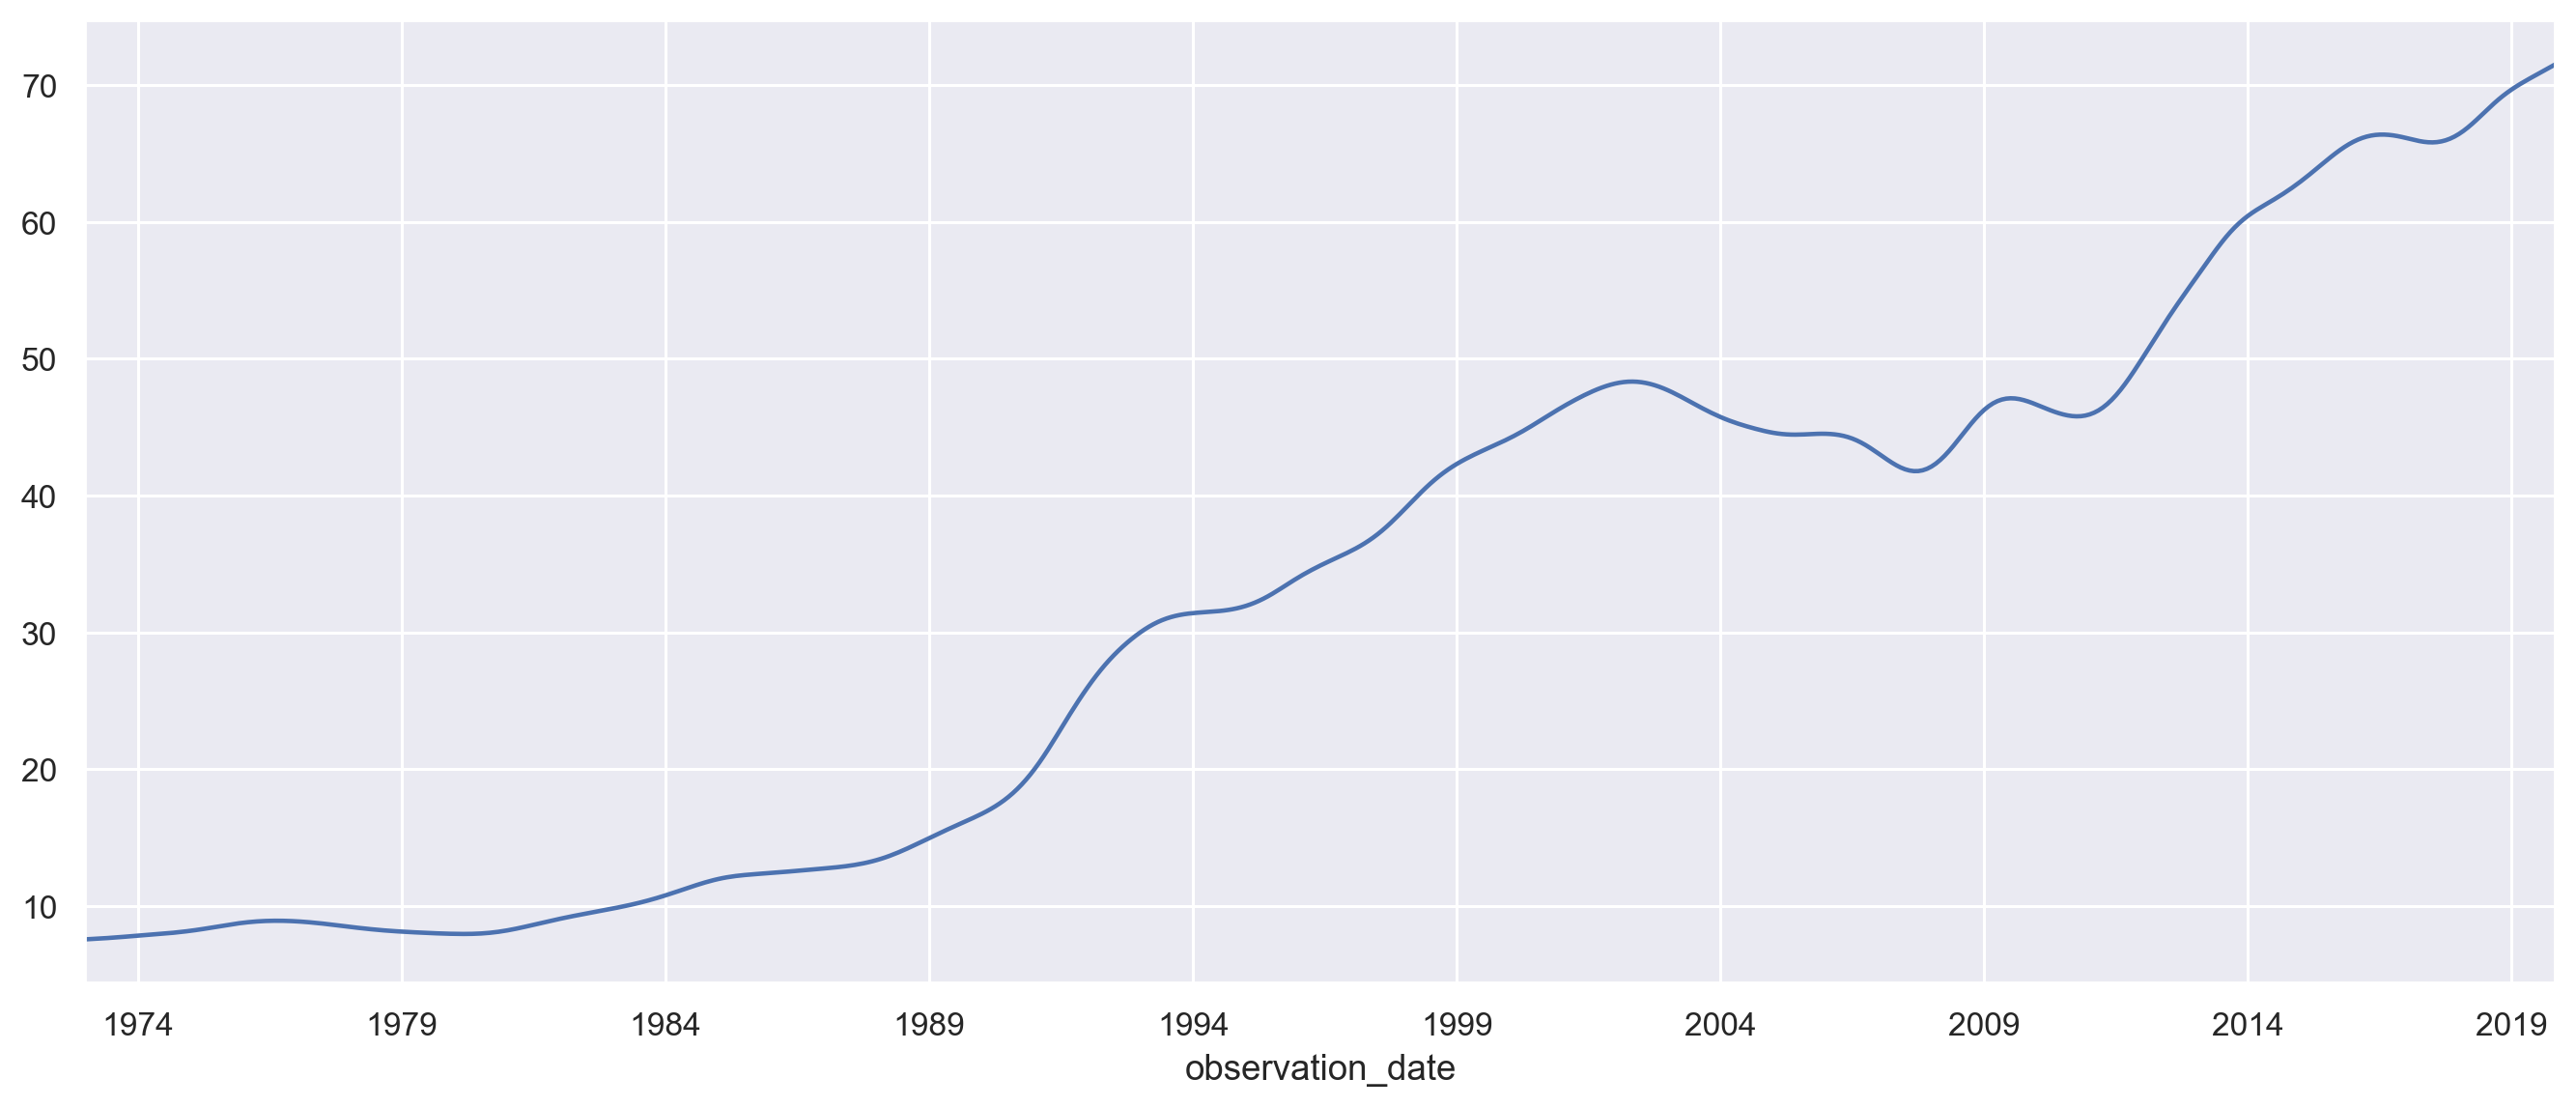

In [37]:
import pandas as pd
from statsmodels.tsa.filters.hp_filter import hpfilter

# Load dataset
df = pd.read_excel('Data\India_Exchange_Rate_Dataset.xls',index_col = 0, parse_dates = True)
print(df.head())

Exinus_cycle, Exinus_trend = hpfilter(df['EXINUS'], lamb = 1600)
Exinus_trend.plot(figsize = (15,6)).autoscale(axis = 'x',tight = True)

#### Detrending a TimeSeries

Detrending is the process of removing a trend from time-series data, or it mentions a change in the mean over time. It is continuously increasing or decreasing over the duration of time. Identification, modeling, and even removing trend data from time-series datasets can be beneficial. The following are methods to detrend time-series data:

1. Pandas differencing
2. SciPy signal
3. HP filter

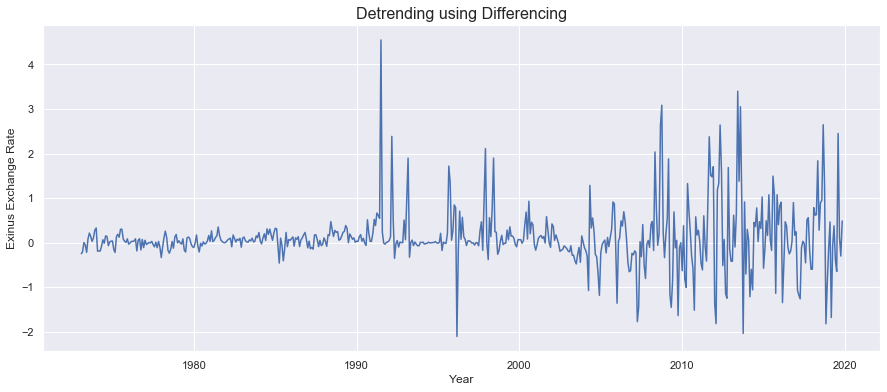

In [14]:
# Pandas Differencing

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load dataset 
# we will use dataset df used in the previous section

diff = df['EXINUS'].diff()

plt.figure(figsize = (15,6))
plt.plot(diff)
plt.title('Detrending using Differencing', fontsize = 16)
plt.xlabel('Year')
plt.ylabel('Exinus Exchange Rate')
plt.show()


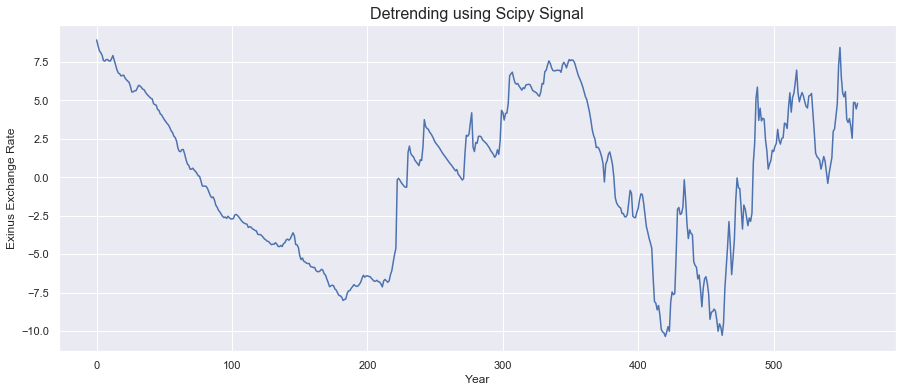

In [15]:
# Scipy Signal # Removing the Linear Trend

from scipy import signal

detrend_scipy = signal.detrend(df['EXINUS'])

plt.figure(figsize = (15,6))
plt.plot(detrend_scipy)
plt.title('Detrending using Scipy Signal', fontsize = 16)
plt.xlabel('Year')
plt.ylabel('Exinus Exchange Rate')
plt.show()

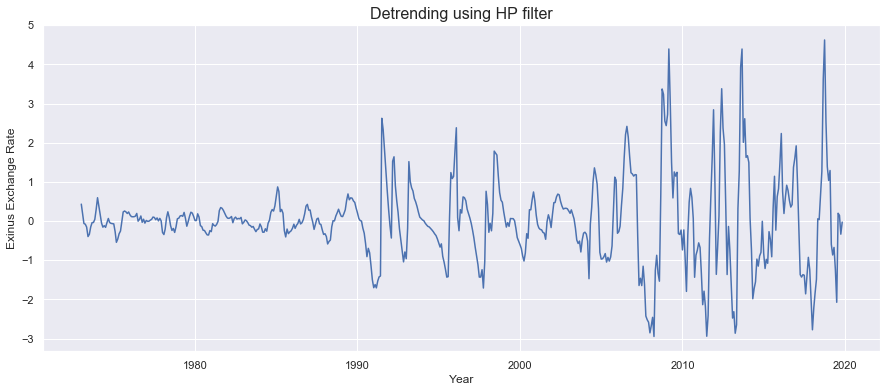

In [16]:
# HP Filter from stats models
# An HP filter is also used to detrend a time series and smooth the data. 
# It’s used for removing short-term fluctuations.

df['hp_trend'] = Exinus_trend
detrended_hp = df['EXINUS'] - df['hp_trend']

plt.figure(figsize = (15,6))
plt.plot(detrended_hp)
plt.title('Detrending using HP filter', fontsize = 16)
plt.xlabel('Year')
plt.ylabel('Exinus Exchange Rate')
plt.show()

### Seasonality

Seasonality is a periodical fluctuation where the same pattern occurs at a regular interval of time. It is a characteristic of economics, weather, and stock market time-series data; less often, it’s observed in scientific data. 

The following methods can be used to detect seasonality:
1. Multiple box plots
2. Autocorrelation plots

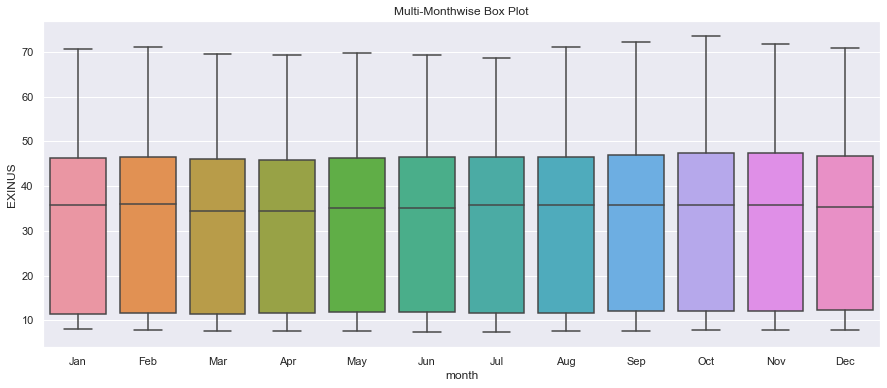

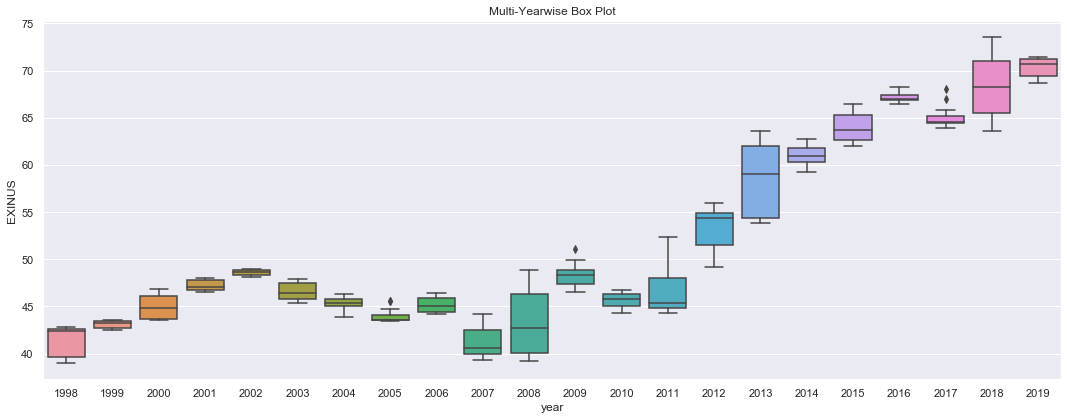

In [30]:
# Multiple box plots
# A box plot is an essential graph to depict data spread out over a range. 
# It is a standard approach to showing the minimum, first quartile, middle, third quartile, and maximum.

df['month'] = [d.strftime('%b') for d in df.index]
df['year'] = [d.year for d in df.index]

plt.figure(figsize = (15,6))
sns.boxplot( x= 'month', y = 'EXINUS', data = df).set_title("Multi-Monthwise Box Plot")
plt.show()

plt.figure(figsize = (15,6))
sns.boxplot( x= 'year', y = 'EXINUS', data = df[300:]).set_title("Multi-Yearwise Box Plot")
plt.tight_layout()
plt.show()


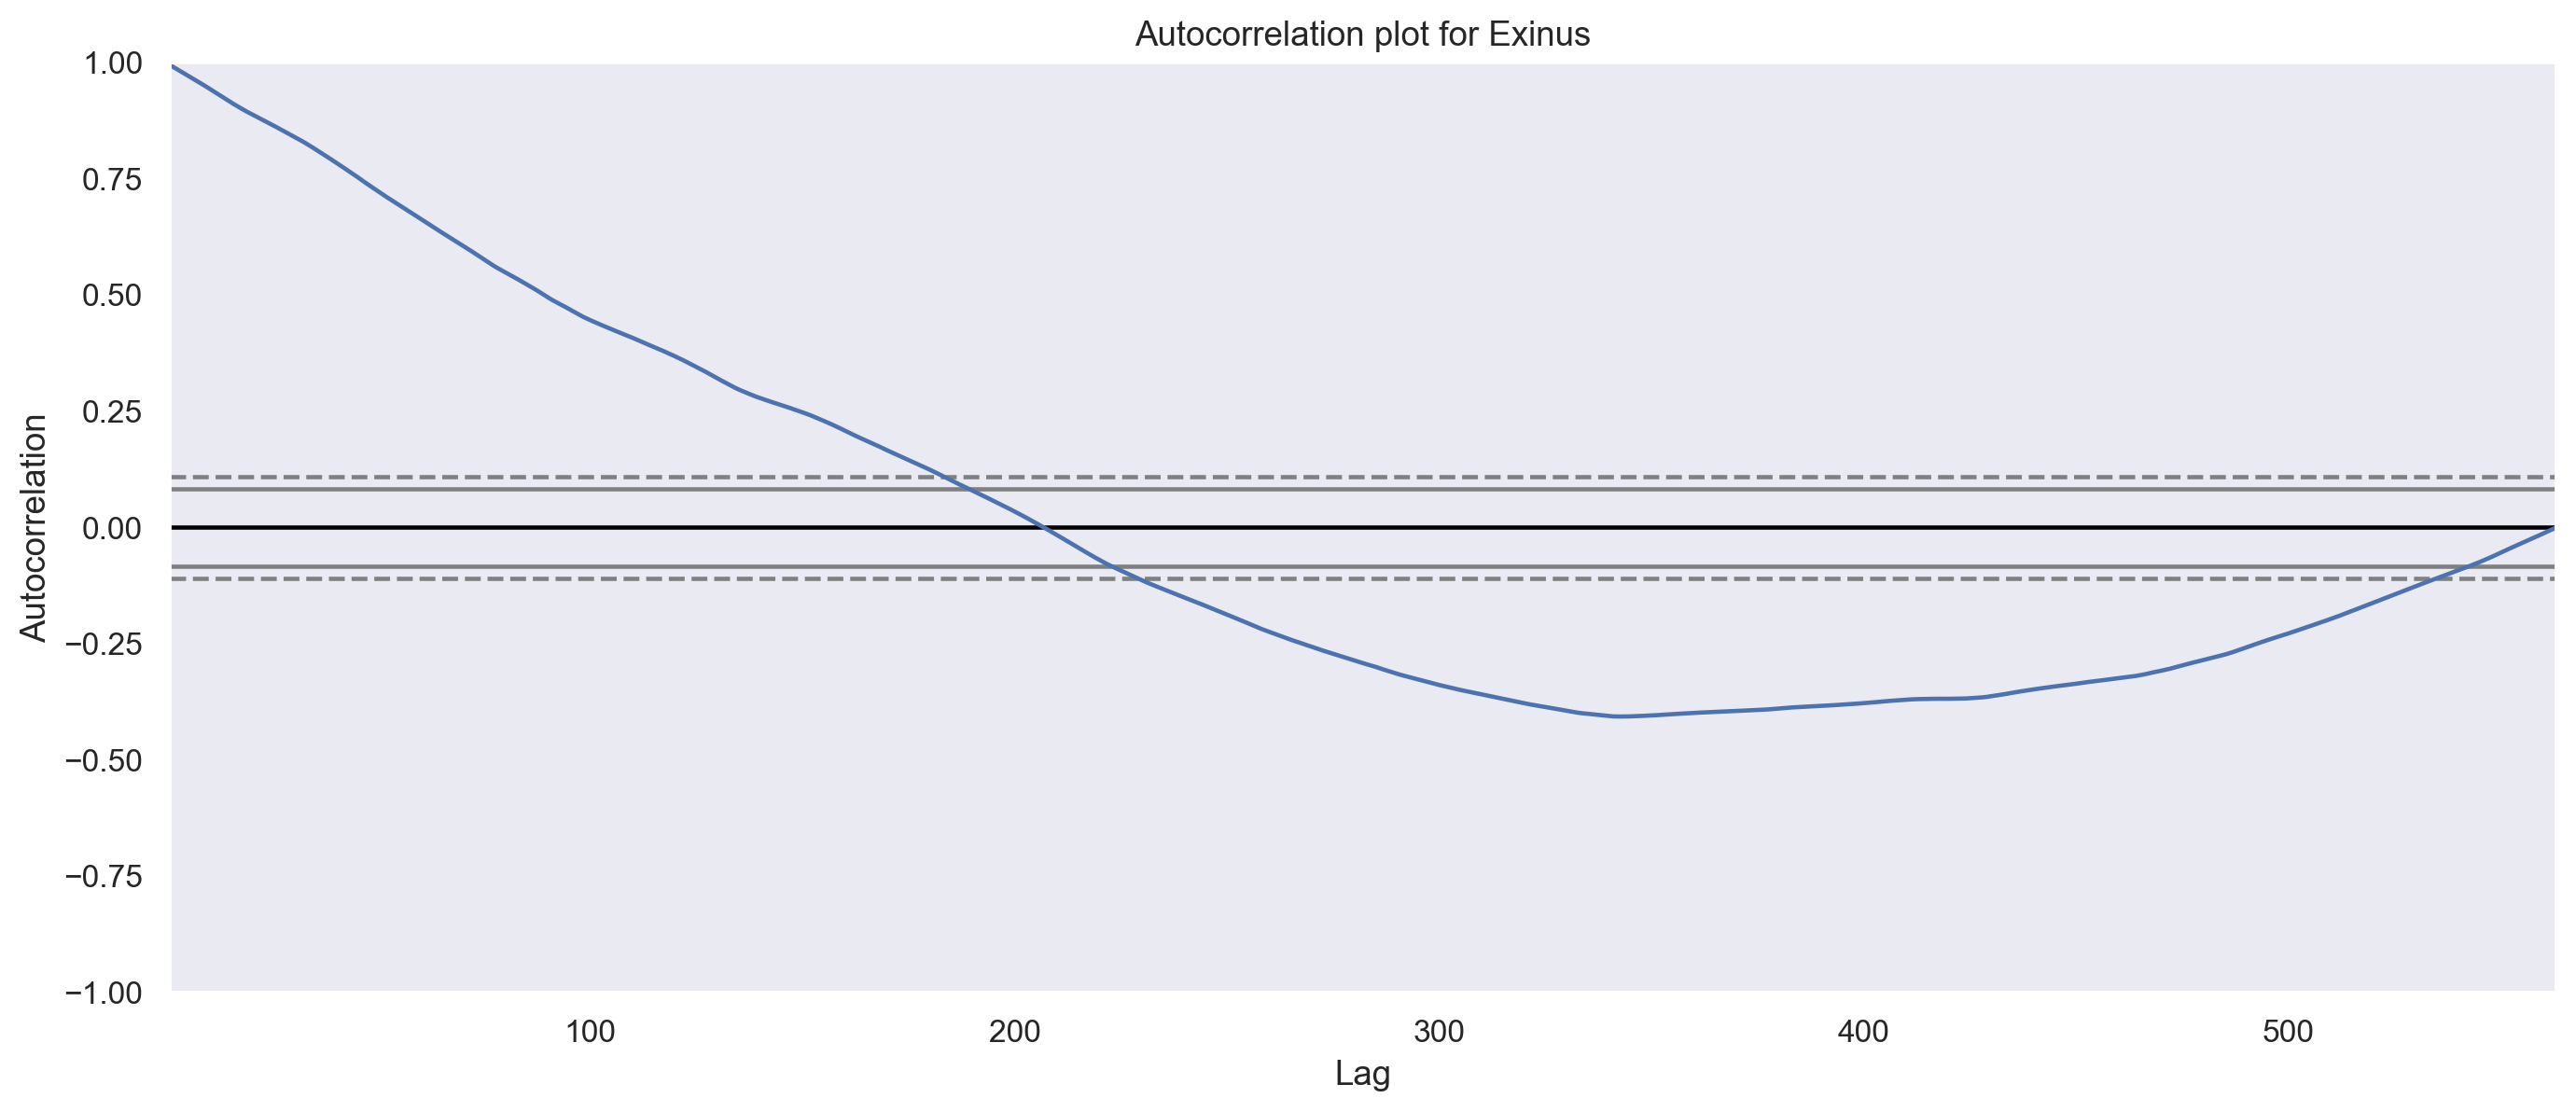

In [35]:
# AutoCorrelation Plots
# Autocorrelation is used to check randomness in data. 
# It helps to identify types of data where the period is not known. 
# For instance, for the monthly data, if there is a regular seasonal effect, 
# we would hope to see massive peak lags after every 12 months

from pandas.plotting import autocorrelation_plot

plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':220})
autocorrelation_plot(df['EXINUS'])
plt.title('Autocorrelation plot for Exinus')
plt.show()


#### Deseasoning  of Time Series of Data

Deseasoning means to remove seasonality from time-series data. It is stripped of the pattern of seasonal effect to deseasonalize the impact. 

Decomposition is the process of understanding generalizations and problems related to time-series forecasting. We can leverage seasonal decomposition to remove seasonality from data and check the data only with the trend, cyclic, and irregular variations. 

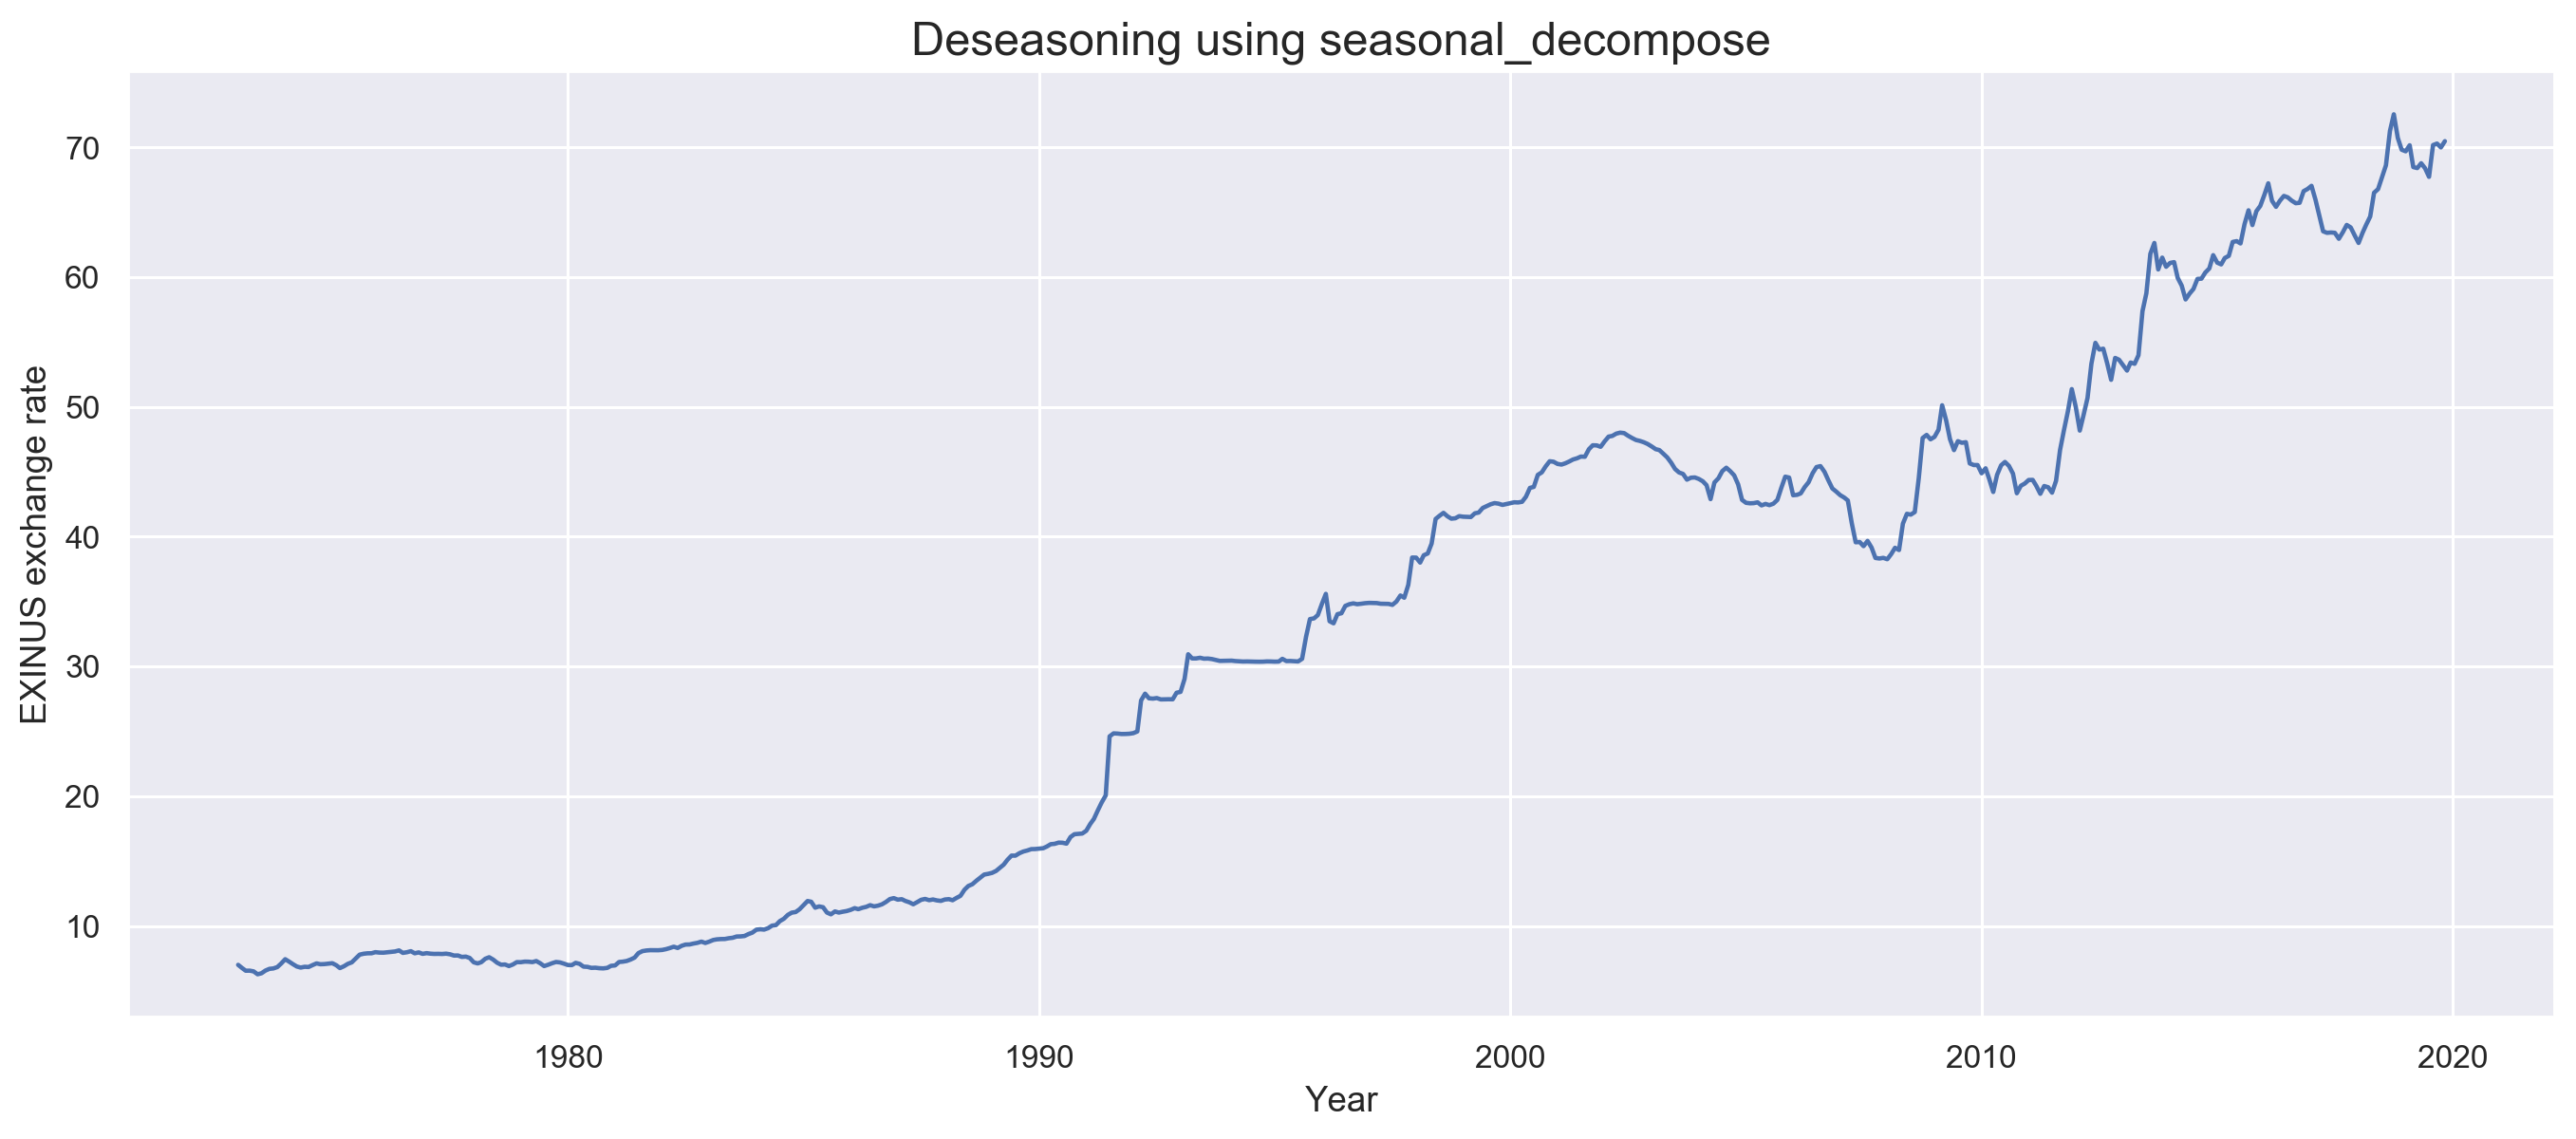

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['EXINUS'], model = 'multiplicative', extrapolate_trend = 'freq')
deseason = df['EXINUS'] - result.seasonal

plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

### Cyclic Variations

Cyclical components are fluctuations around a long trend observed every few units of time; this behavior is less frequent compared to seasonality. It is a recurrent process in a time series. In the field of business/economics, the following are three distinct types of cyclic variations examples:

Prosperity: As we know, when organizations prosper, prices go up, but the benefits also increase. On the other hand, prosperity also causes over-development, challenges in transportation, increments in wage rate, insufficiency in labor, high rates of returns, deficiency of cash in the market and price concessions, etc., leading to depression

Depression: As we know, when there is cynicism in exchange and enterprises, processing plants close down, organizations fall flat, joblessness spreads, and the wages and costs are low.


Accessibility: This causes idealness of money, accessibility of cash at a low interest, an increase in demand for goods or money at a low interest rate, an increase in popular merchandise and ventures described by the circumstance of recuperation that at last prompts for prosperity or boom.

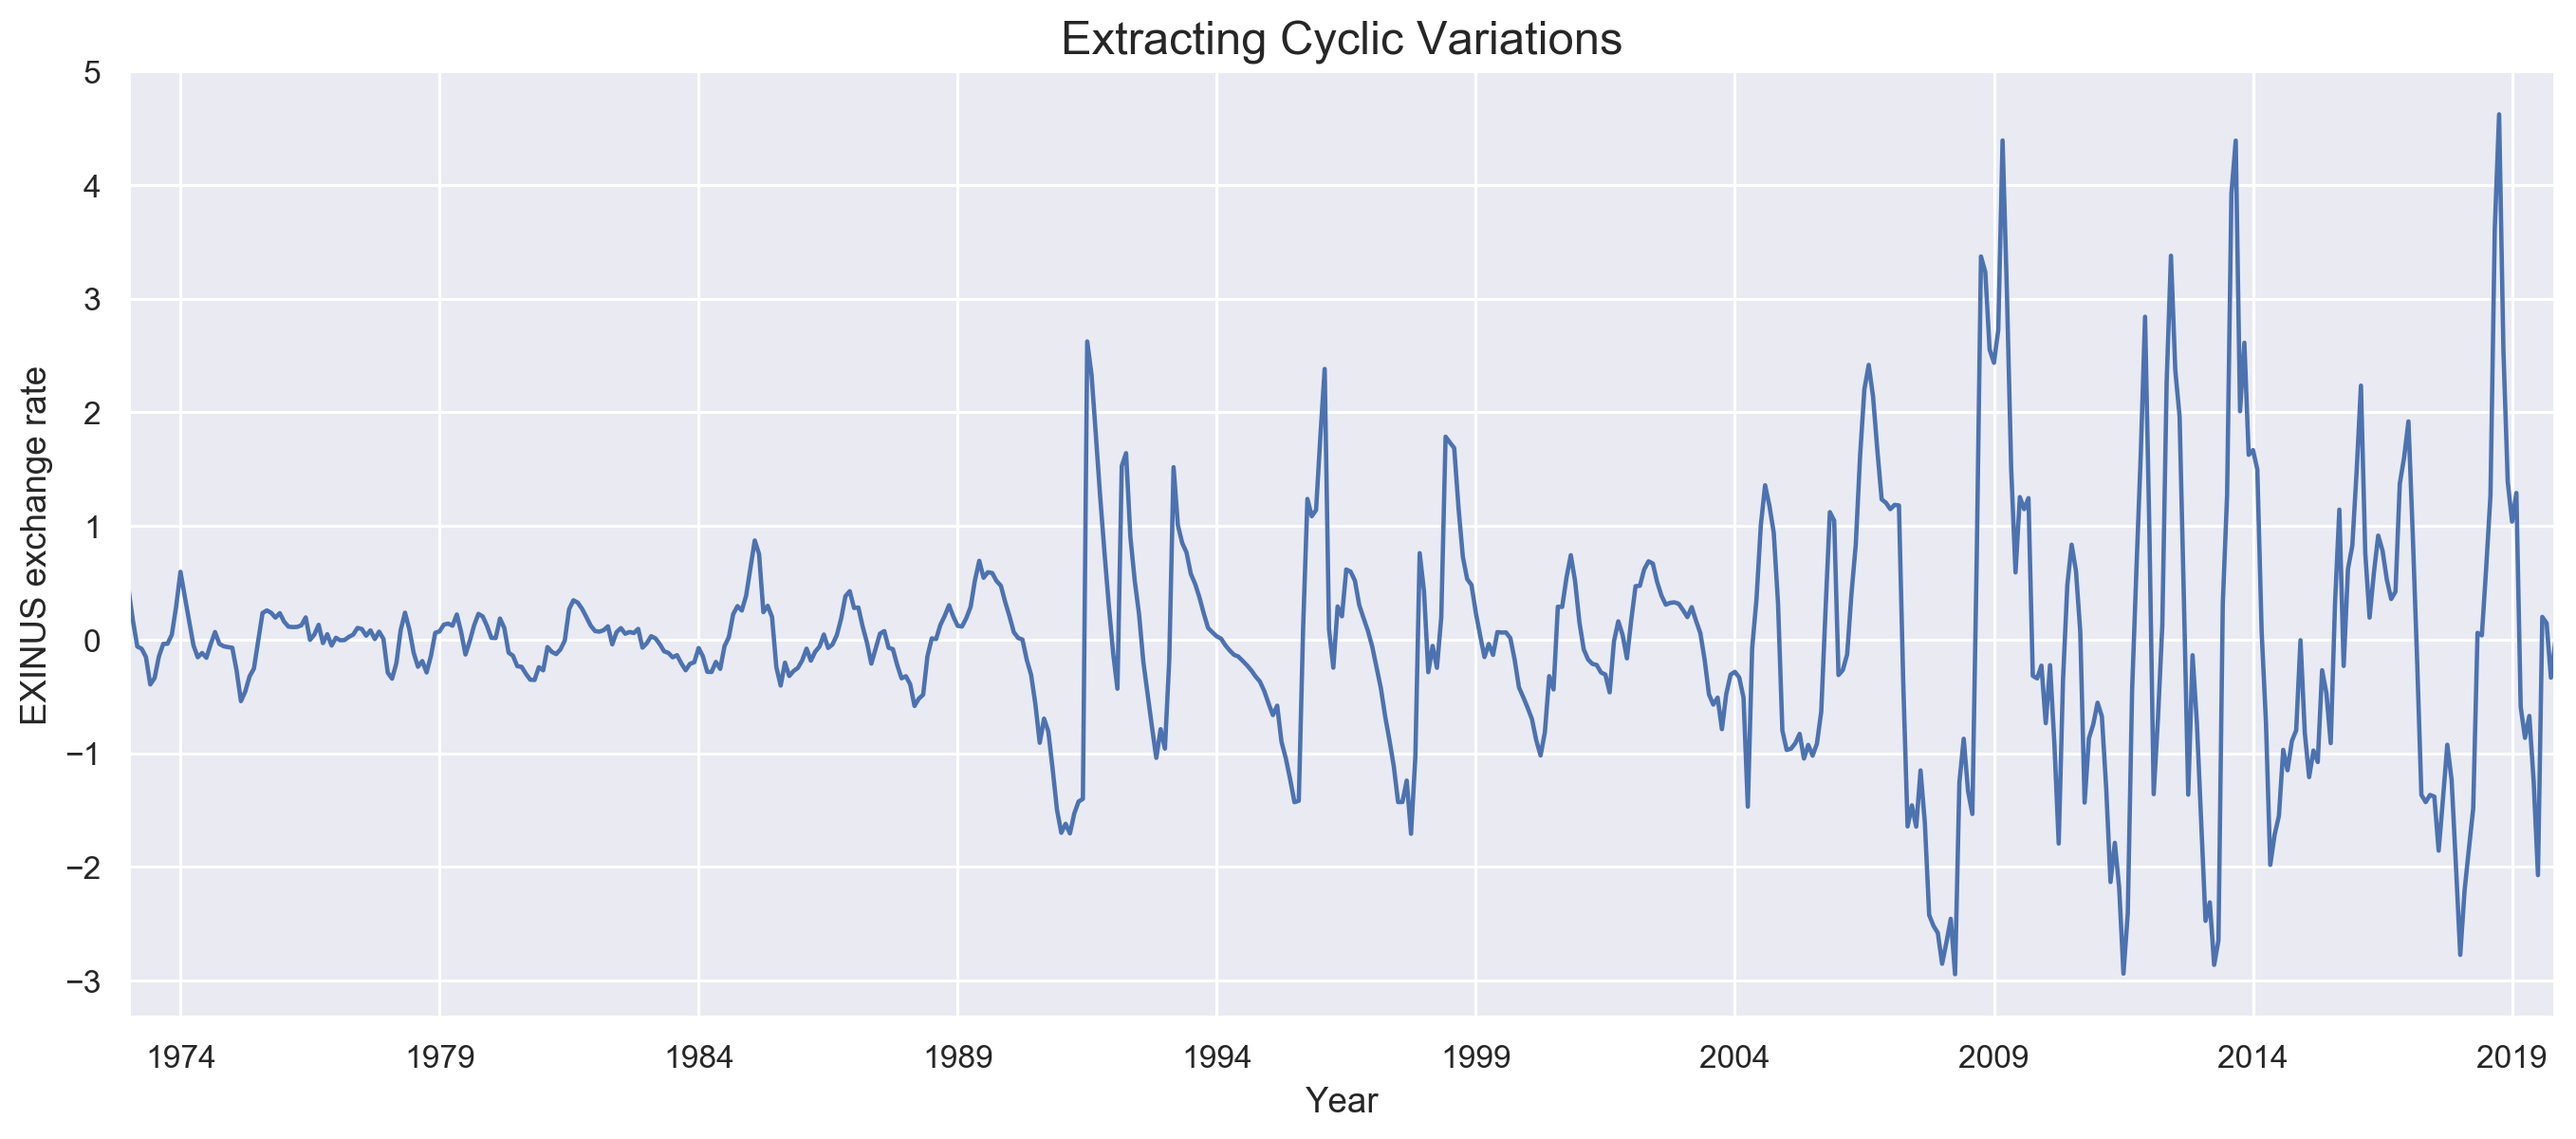

In [40]:
Exinus_cycle, Exinus_trend = hpfilter(df['EXINUS'], lamb = 1600)
Exinus_cycle.plot(figsize = (15,6)).autoscale(axis = 'x',tight = True)

plt.title('Extracting Cyclic Variations', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

### Errors, Unexpected variations, Residuals

When trend and cyclical variations are removed from time-series data, the patterns left behind that cannot be explained are called errors, unexpected variations, or residuals. Various methods are available to check for irregular variations such as probability theory, moving averages, and autoregressive time-series methods. If we can find any cyclic variation in data, it is considered to be part of the residuals. These variations that occur due to unexpected circumstances are called unexpected variations or unpredictable errors.

## Decomposition of Timeseries into its Components

Decomposition is a method used to isolate the time-series data into different elements such as trends, seasonality, cyclic variance, and residuals. We can leverage seasonal decomposition from a stats model to decompose the data into its constituent parts, considering series as additive or multiplicative. An additive model is when time-series data combines these four components for linear trend and seasonality, and a multiplicative model is when components are multiplied to gather for nonlinear trends and seasonality.

1. Trends(T(t)) means an increase or decrease in the value of ts data.

2. Seasonality(S[t]) means repeating a short-term cycle of ts data.

3. Cyclic variations(c[t]) means a fluctuation in long trends of ts data.

4. Residuals(e[t]) means an irregular variation of ts data.

The additive model works with linear trends of time-series data such as changes constantly over time. The additive model formula is as follows:

Y[t] = T[t] + S[t] + c[t] + e[t]

The multiplicative model works with a nonlinear type of data such as quadric or exponential. The multiplicative model formula is as follows:

Y[t] = T[t] * S[t] * c[t] * e[t]



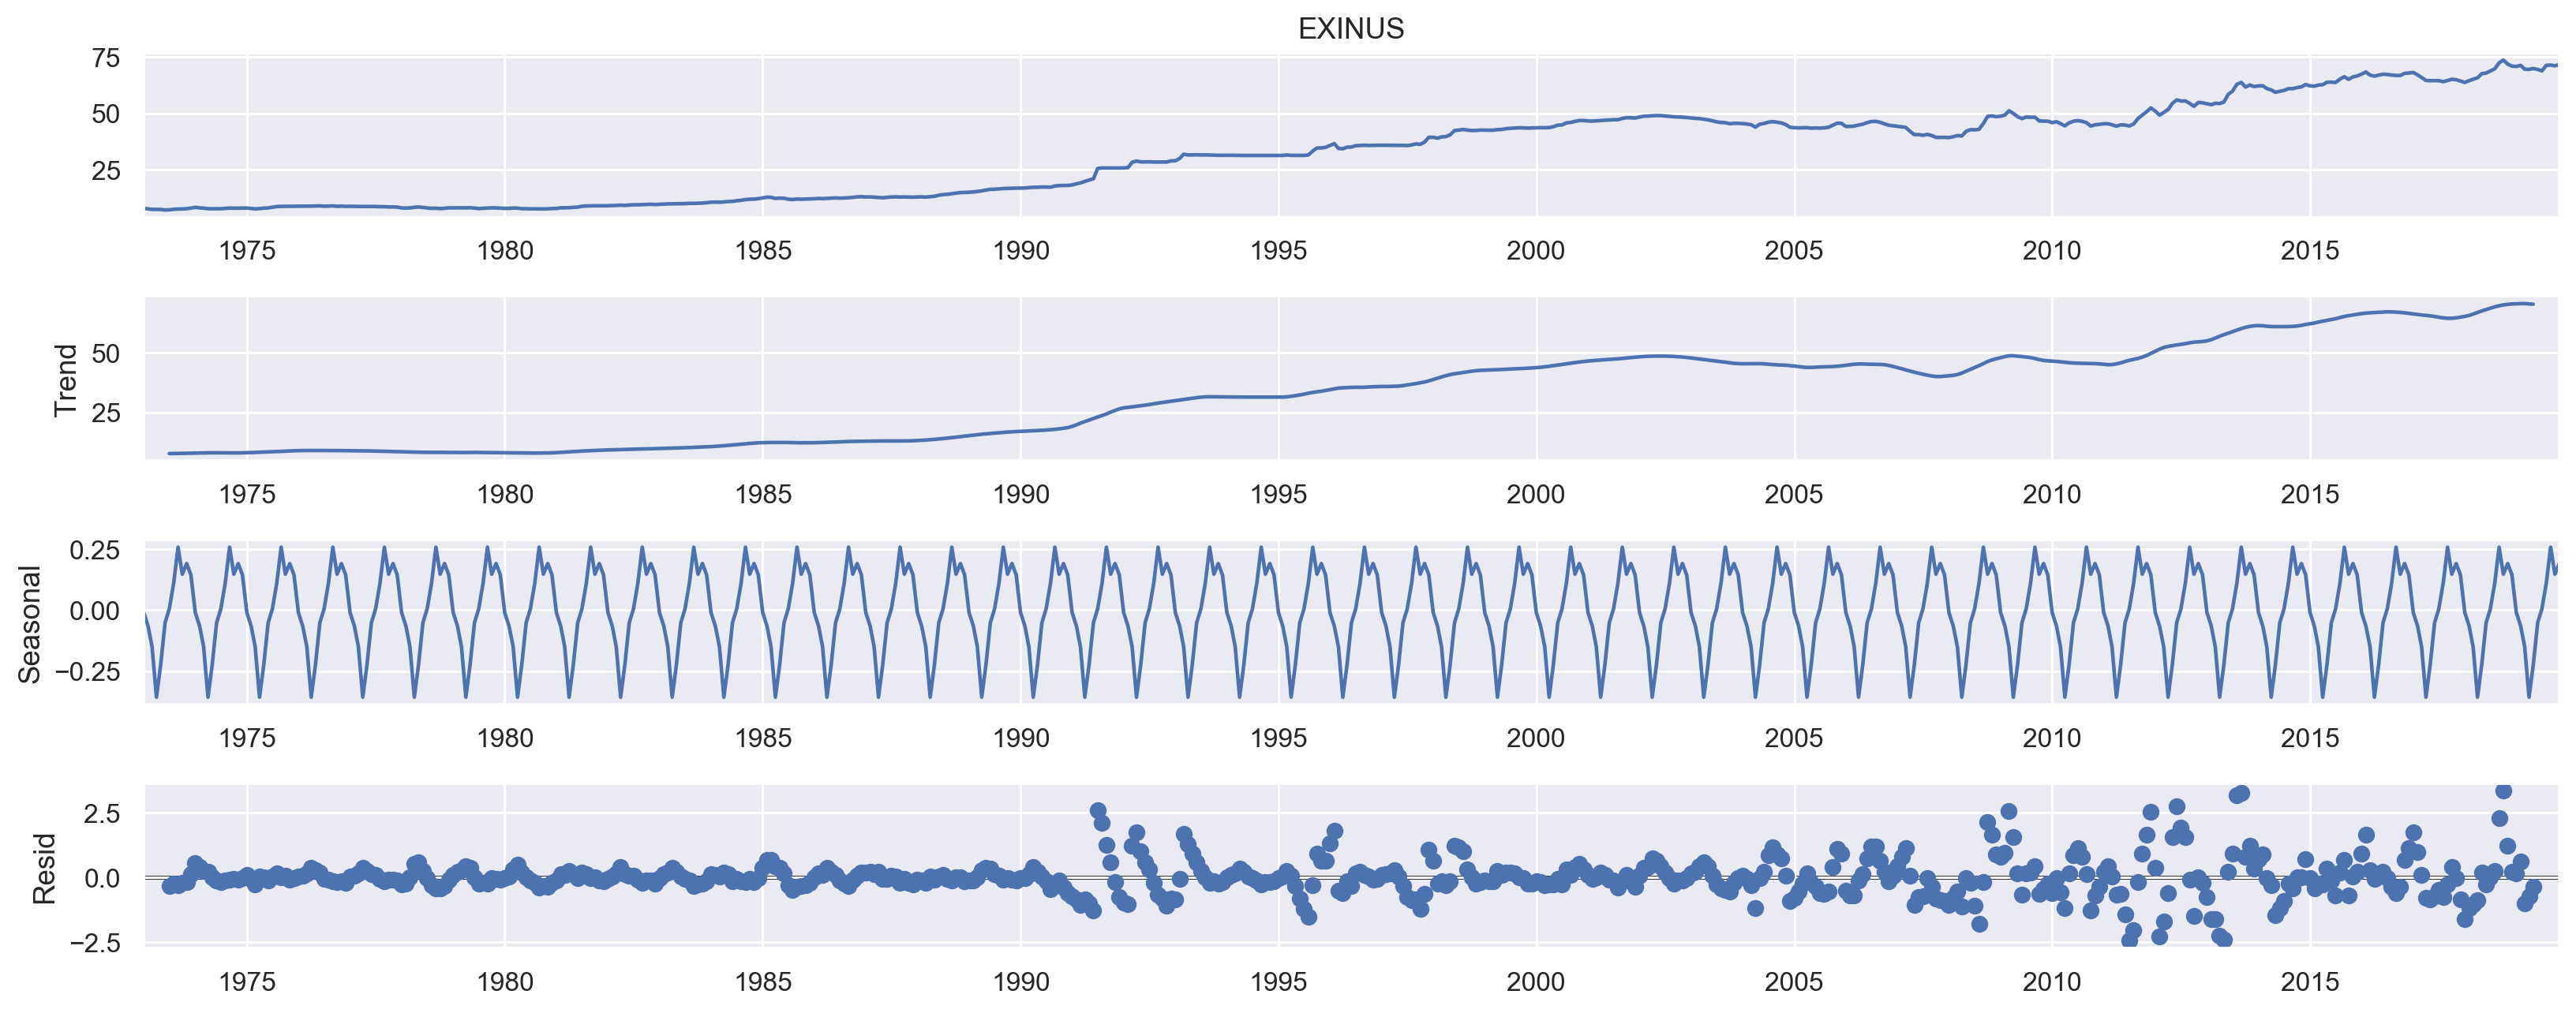

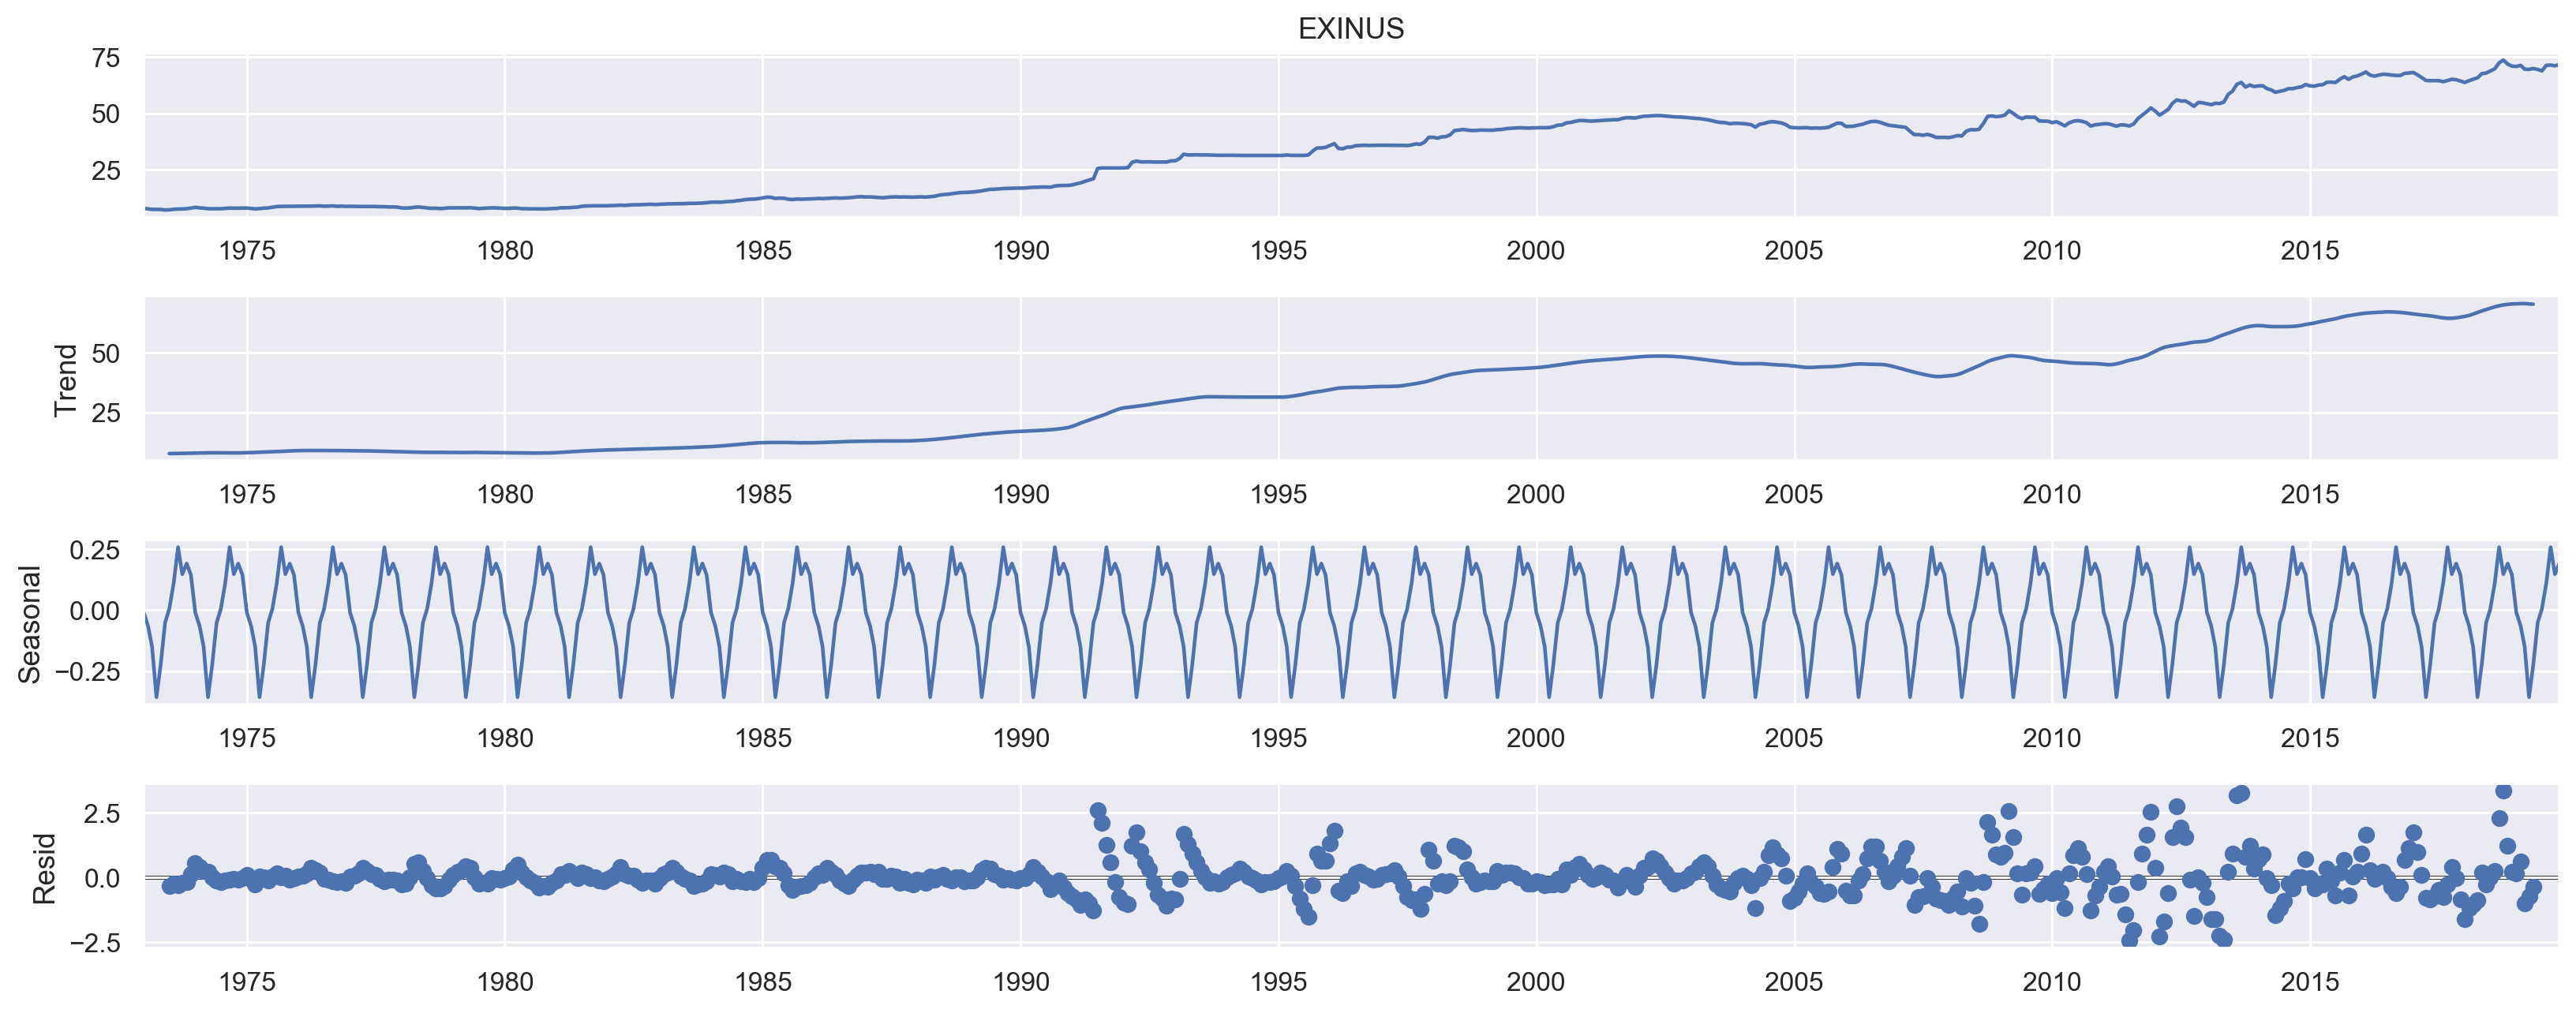

In [47]:
# Additive

result = seasonal_decompose(df['EXINUS'], model = "add")
result.plot()

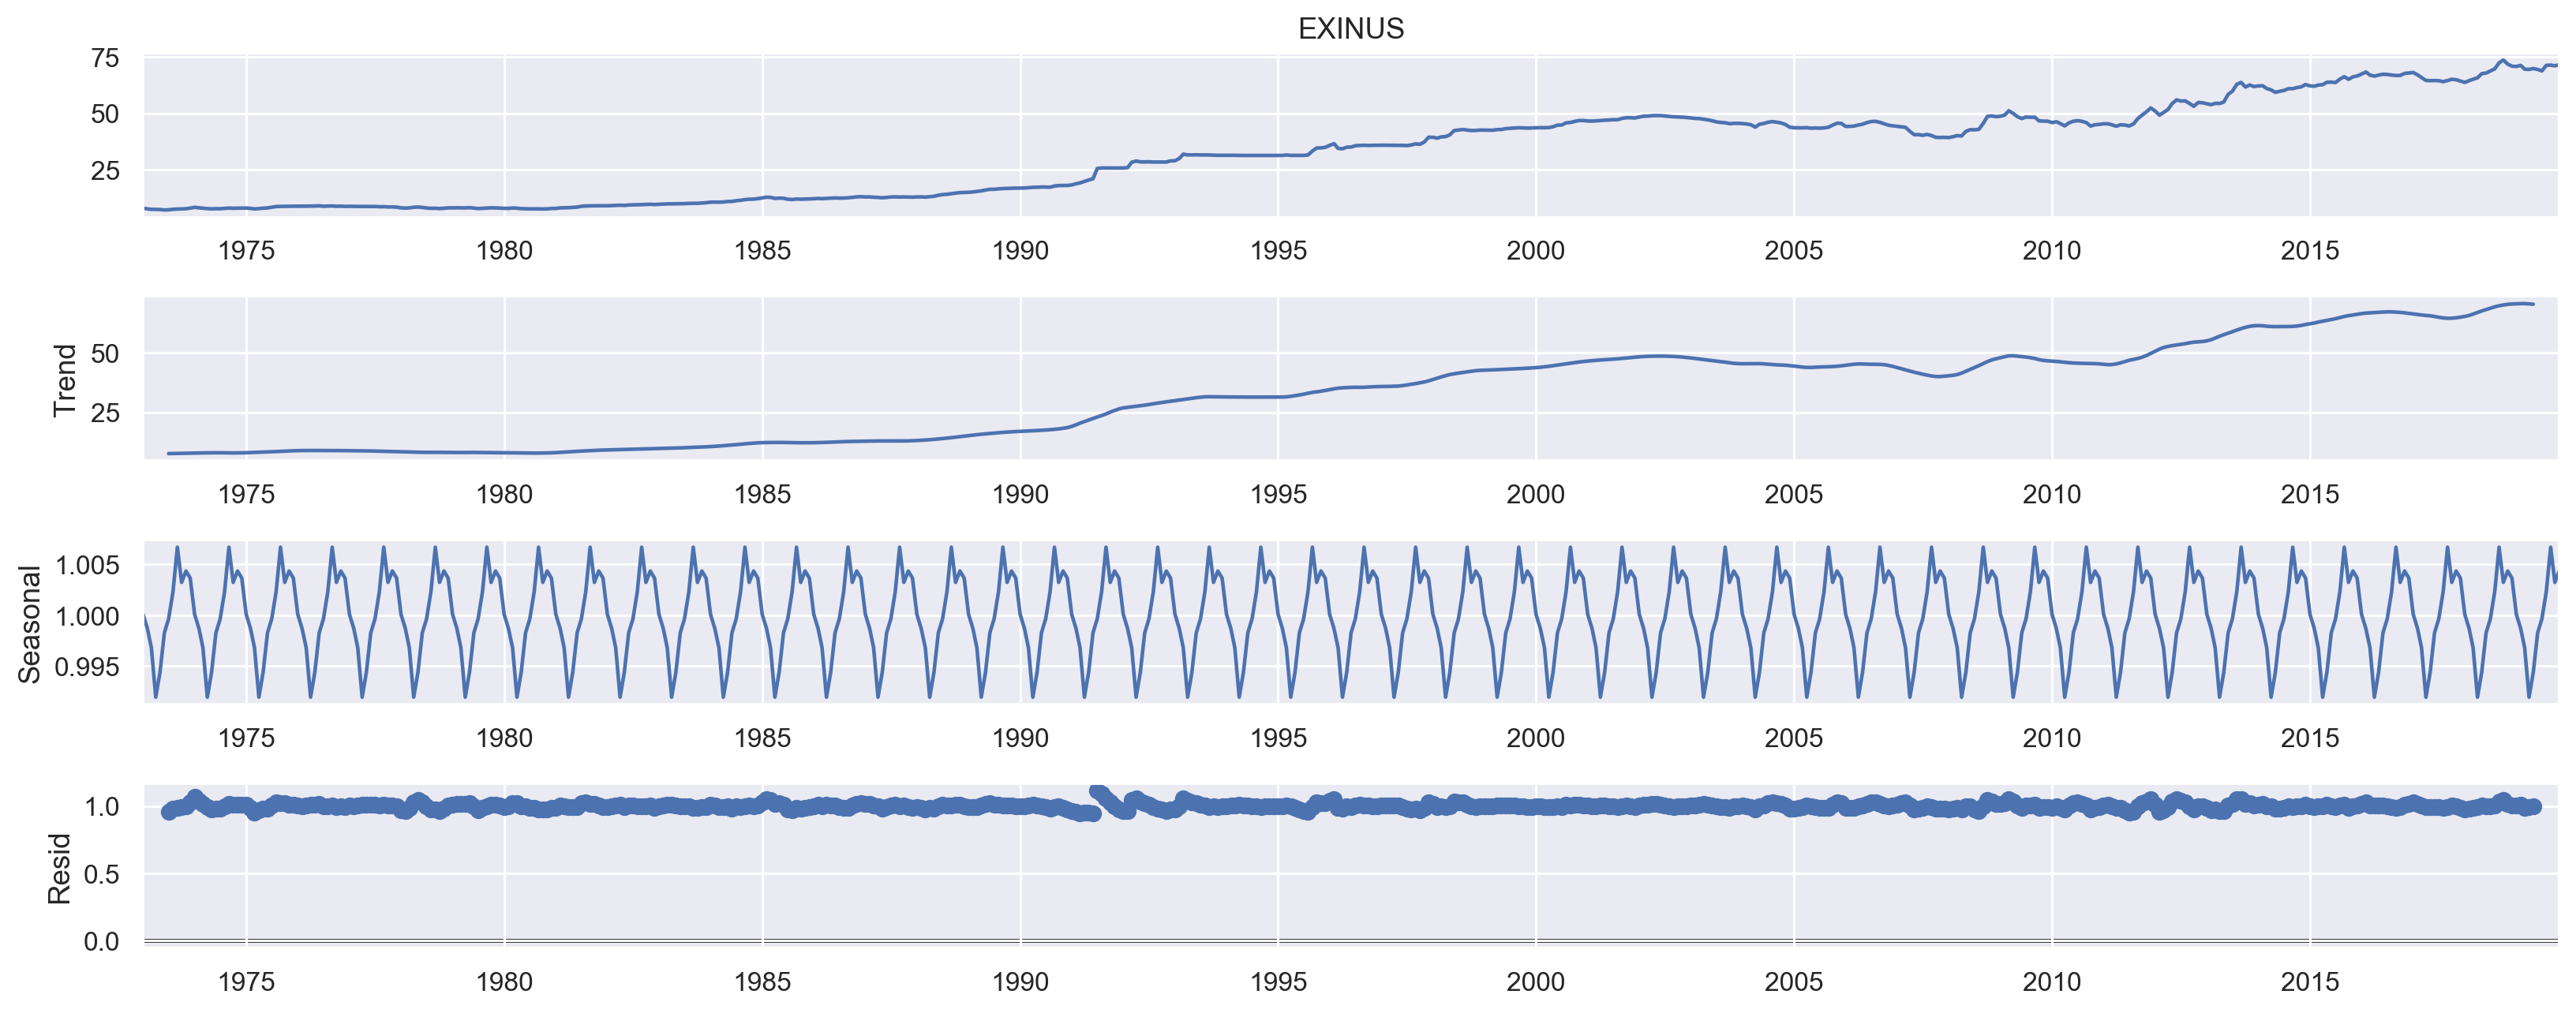

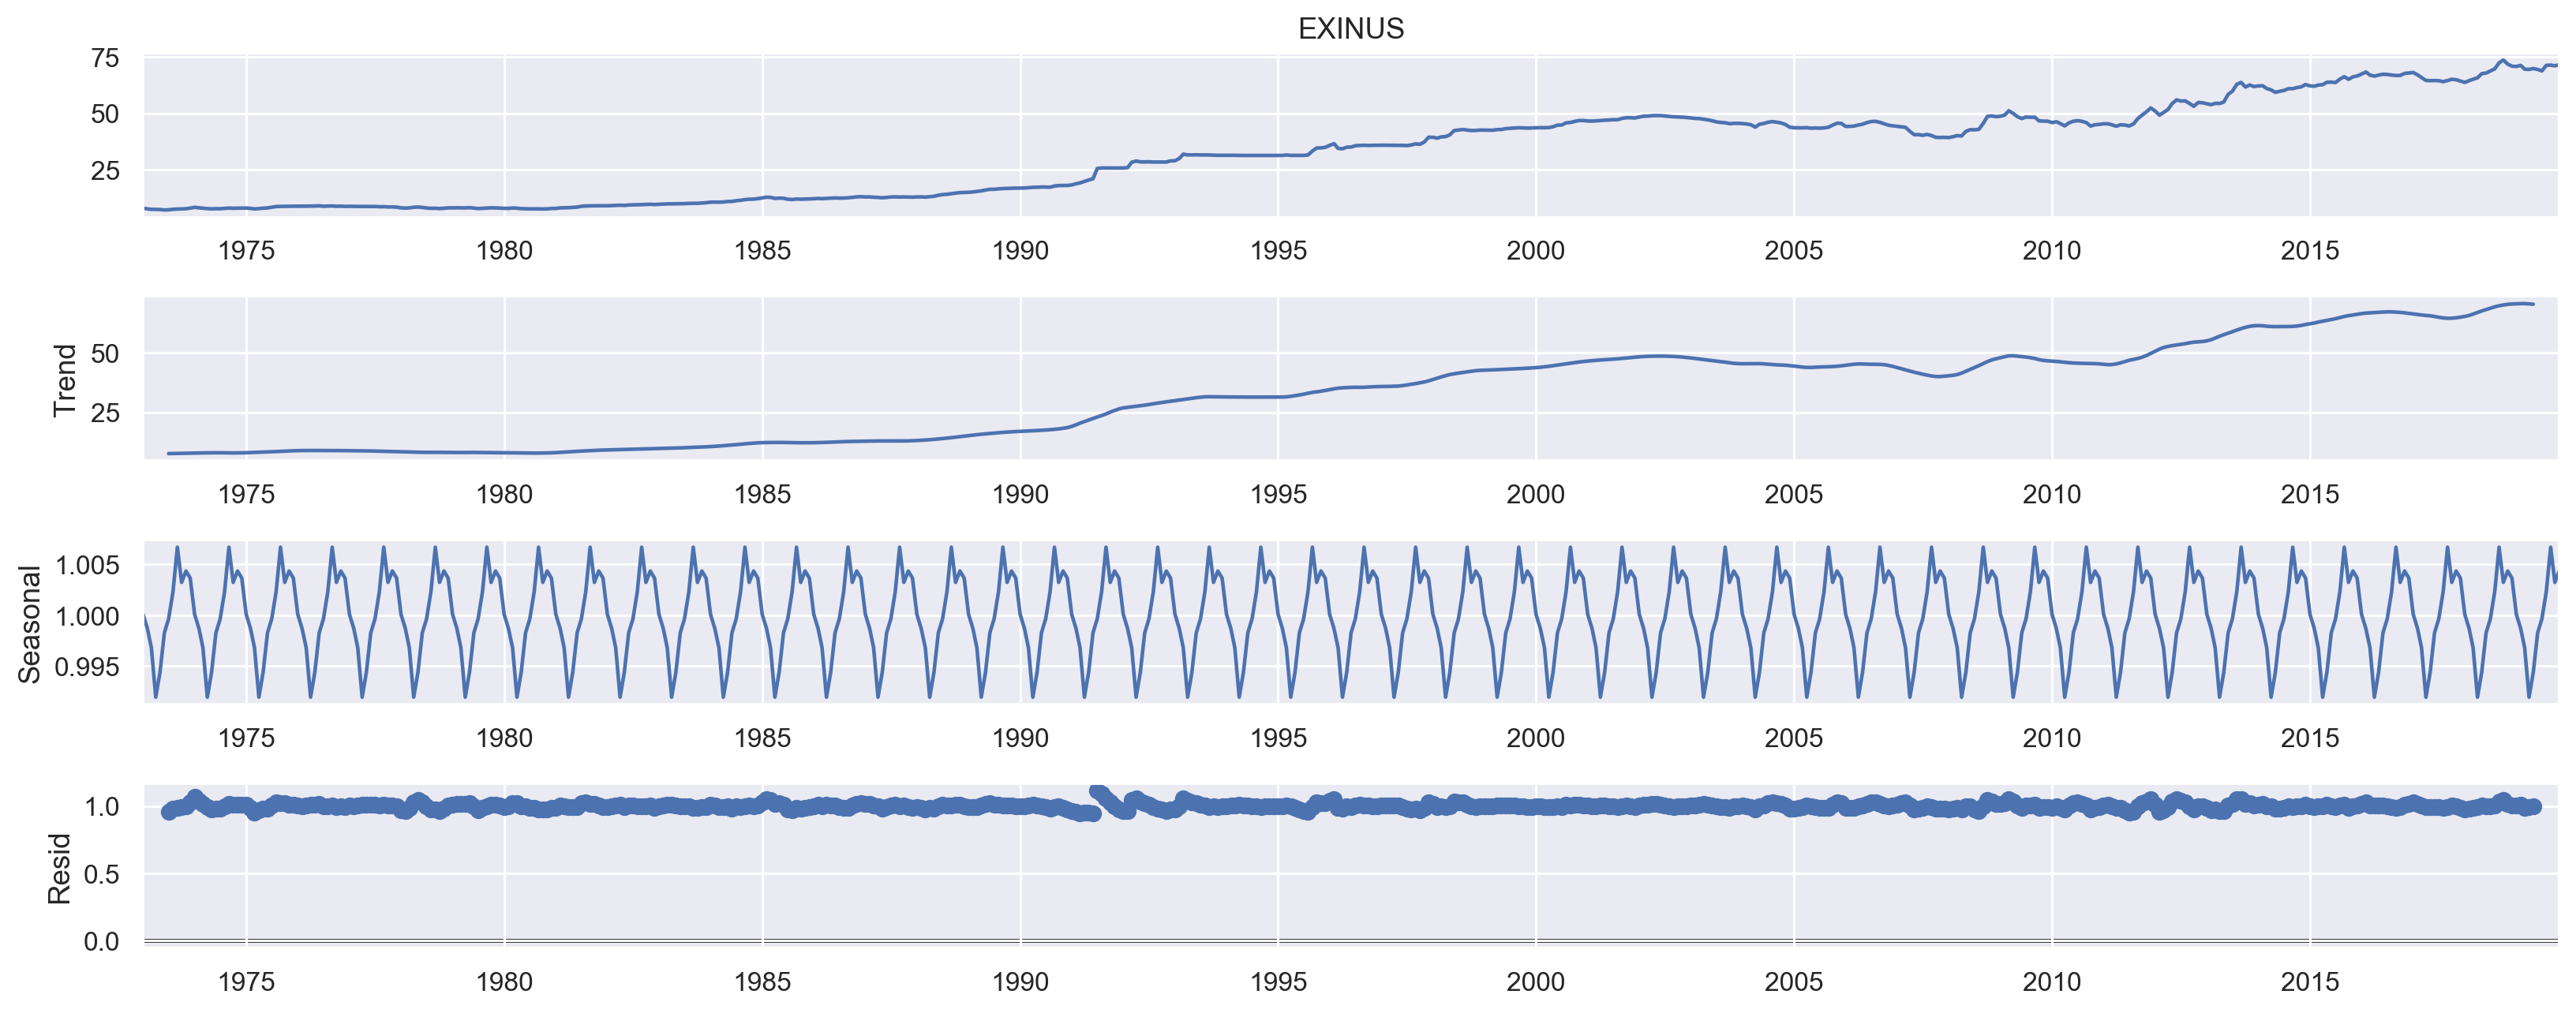

In [48]:
# Multiplicative

result = seasonal_decompose(df['EXINUS'], model = "mul")
result.plot()

Text(0.5, 1.0, 'Distribution of Exchange rates_EXINUS')

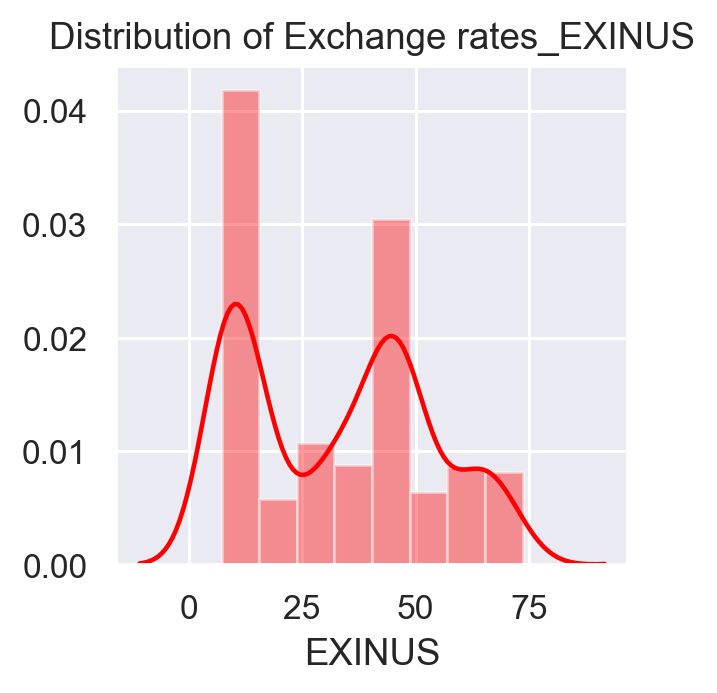

In [53]:
plt.figure(figsize=(3, 3)) 
g = sns.distplot(df['EXINUS'], norm_hist=False, color = 'red') 
g.set_title('Distribution of Exchange rates_EXINUS') 

Text(0.5, 1.0, 'Density_EXINUS')

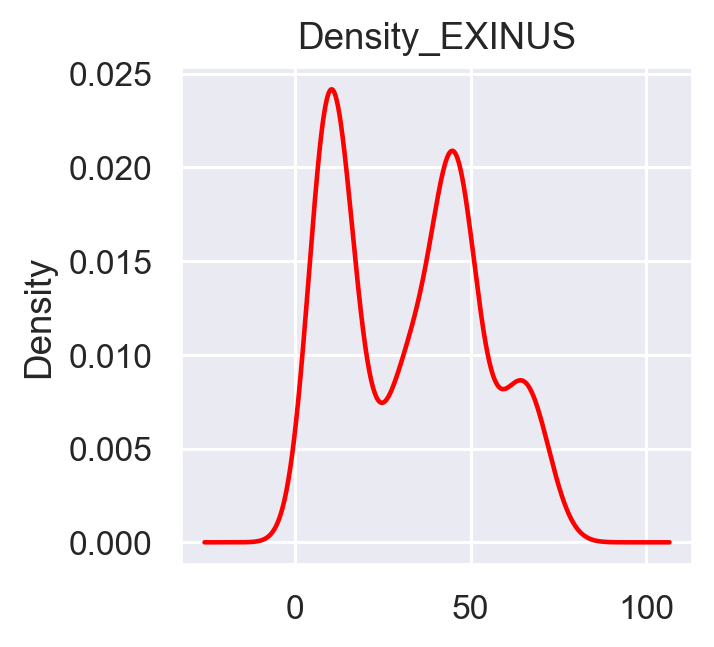

In [63]:
plt.figure(figsize=(3, 3)) 
df['EXINUS'].plot(kind = 'kde', color = 'red')
plt.title('Density_EXINUS')

Text(0.5, 1.0, 'Frequency_Distribution_EXINUS')

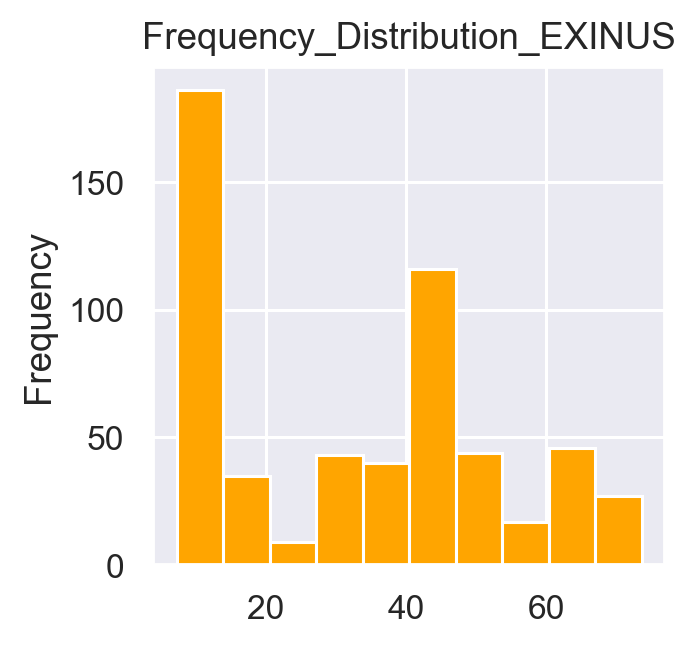

In [62]:
plt.figure(figsize=(3, 3)) 
df['EXINUS'].plot(kind = 'hist', color = 'Orange')
plt.title('Frequency_Distribution_EXINUS')